In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv("Telco Customer Churn Dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Cleaning and Normalization 

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.shape

(7043, 21)

In [46]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Looks like the data is clean, we can transform the gender into 0's and 1's but it is not necessary here
Now we move to data analysis part


# Data Analysis

In [15]:
#Let see which gender is the most occuring
df.value_counts("gender")


gender
Male      3555
Female    3488
Name: count, dtype: int64

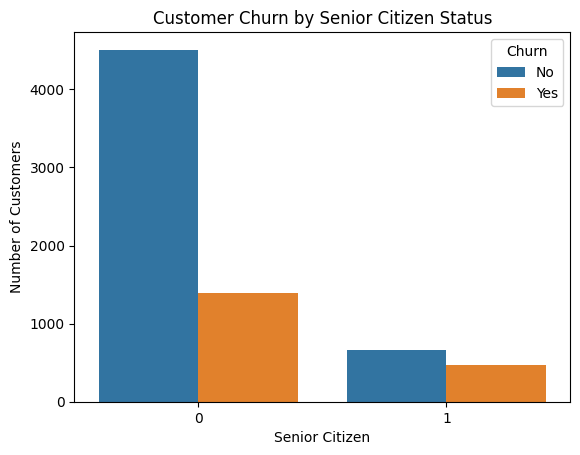

In [16]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')


plt.title('Customer Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()

#The graph below tells us that where there is no senior citizen, the customer churn is higher

In [19]:
churned_customers = df[df['Churn'] == 'Yes']
churned_customers

gender_churn_count = churned_customers["gender"].value_counts()
print("Churned Customers by Gender:")
print(gender_churn_count)

# That tells us that female genders are more churn, but that wont really matter because difference is not much

Churned Customers by Gender:
gender
Female    939
Male      930
Name: count, dtype: int64


In [20]:
df.value_counts("InternetService")
#Fiber optic is mostly used

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

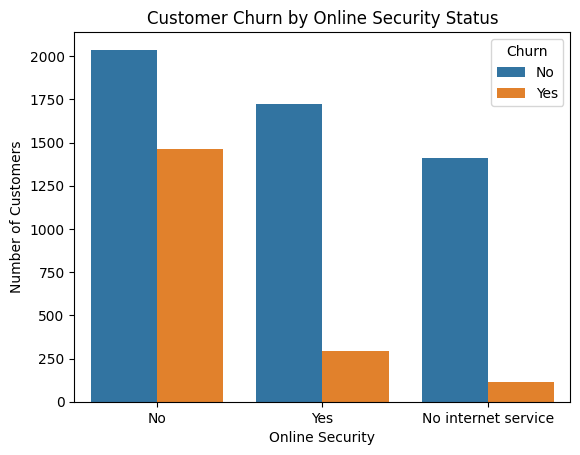

In [21]:
#Checking if online security is a factor n churn analysis

sns.countplot(data=df, x='OnlineSecurity', hue='Churn')

# Set the title and labels for better understanding
plt.title('Customer Churn by Online Security Status')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')


plt.show()

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


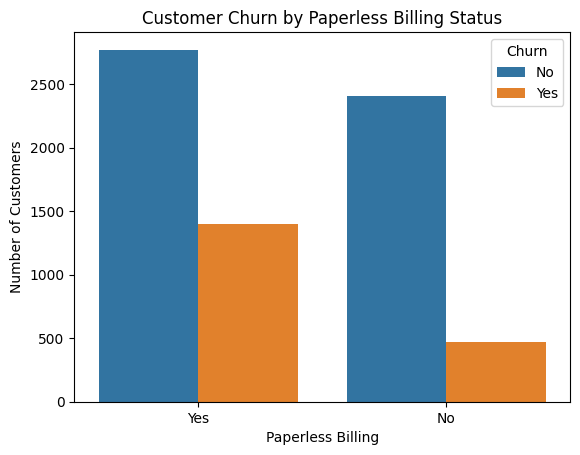

In [24]:
sns.countplot(data=df, x='PaperlessBilling', hue='Churn')

# Set the title and labels for better understanding
plt.title('Customer Churn by Paperless Billing Status')
plt.xlabel('Paperless Billing')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')


plt.show()

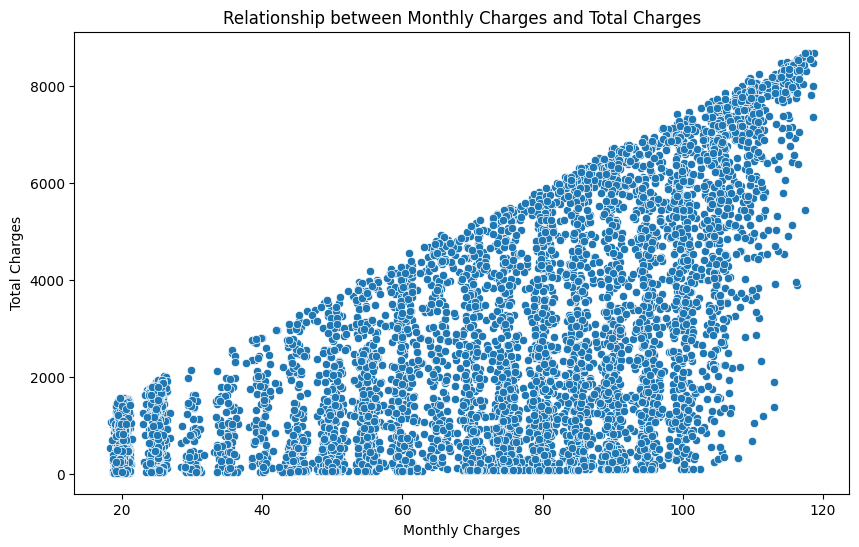

In [40]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop any rows where 'TotalCharges' is NaN (resulting from the coercion)
df = df.dropna(subset=['TotalCharges'])

# Create a scatter plot to visualize the relationship between MonthlyCharges and TotalCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges')

#title and labels
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')


plt.show()

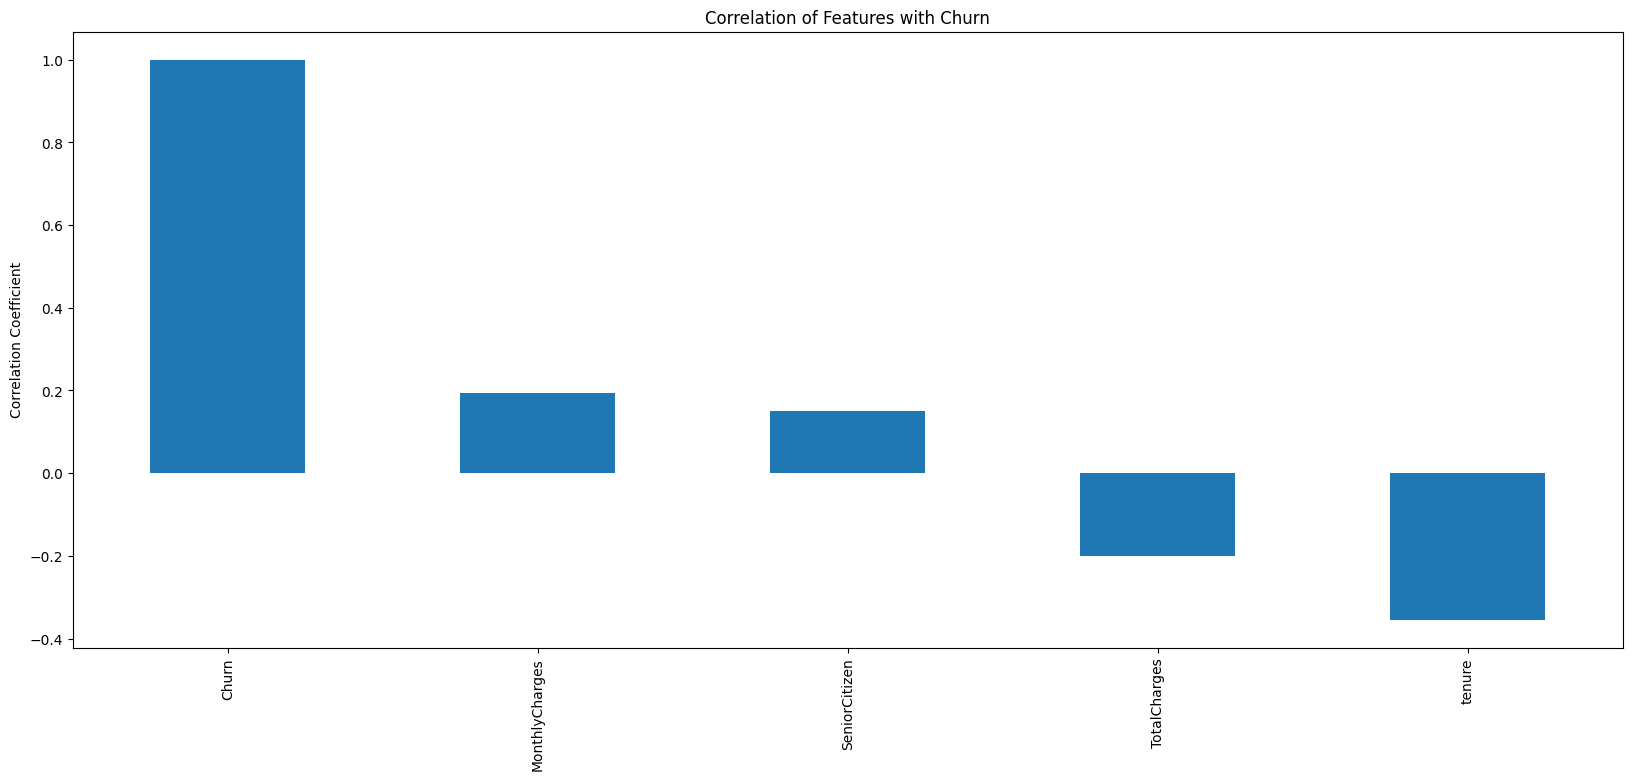

In [45]:
# Convert 'Churn' column to numeric if it's categorical
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# correlation of all columns with 'Churn' and sort the values
plt.figure(figsize=(20, 8))
numeric_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


plt.title('Correlation of Features with Churn')
plt.ylabel('Correlation Coefficient')


plt.show()